# Introduction of Signal Processing 


Signal processing is a crucial aspect of seismology that involves analyzing and interpreting seismic data to understand the underlying geological processes. Seismic signals, recorded by seismometers, contain valuable information about earthquakes, volcanic eruptions, and other seismic events. We can extract meaningful insights from these raw data by applying various signal-processing techniques.

**Objectives of this Notebook**
This notebook aims to introduce the basics of signal processing in the context of seismology. We will cover essential techniques and demonstrate how to apply them to real seismic data. By the end of this notebook, you will be able to:

- **Download and visualize seismic data** from well-known sources using the ObsPy client.
- **Apply basic signal processing techniques** such as filtering and Fourier Transform to seismic signals.
- **Visualize the processed signals** to understand their characteristics.
- **Explore advanced signal processing methods** like wavelet transforms and spectrograms for more detailed analysis.

**Author:** Marc Garcia, University of Texas - El Paso, magarcia58@miners.utep.edu

In [ ]:
#Check for correct Image (GeoLab)
!printenv | grep IMAGE

# 1. Introduction and Data Acquisition

To illustrate the basics of signal processing in seismology, we will use seismic data from the 2023 West Texas earthquake, an example of induced seismicity. This earthquake occurred on November 8, 2023, with a magnitude of 5.3 and was felt across Texas in cities such as El Paso, Lubbock, and Abilene. The event is believed to have been triggered by hydraulic fracturing (fracking) activities in the region. Induced seismicity, such as this, is becoming increasingly common in areas with extensive oil and gas extraction operations. Texas, along with Oklahoma, ranks among the highest oil extraction states in the U.S.

Learn more about the earthquake: [Here](https://www.elpasotimes.com/story/news/2023/11/08/earthquake-tx-mentone-hit-my-5-3-magnitude-quake/71500906007/).

We will retrieve the seismic signal from the TX.ODSA station, part of the Texas Seismic Network, which is located near the epicenter. The data from this local seismic station will allow us to analyze the earthquake's characteristics and understand the impact of human activities on seismic events.

Event time: 2023-11-08T10:27:00.000000Z
Location: (31.372, -103.78)
Magnitude: 5.3
3 Trace(s) in Stream:
TX.ODSA.00.HH1 | 2023-11-08T10:28:00.000000Z - 2023-11-08T10:32:00.000000Z | 200.0 Hz, 48001 samples
TX.ODSA.00.HH2 | 2023-11-08T10:28:00.000000Z - 2023-11-08T10:32:00.000000Z | 200.0 Hz, 48001 samples
TX.ODSA.00.HHZ | 2023-11-08T10:28:00.000000Z - 2023-11-08T10:32:00.000000Z | 200.0 Hz, 48001 samples


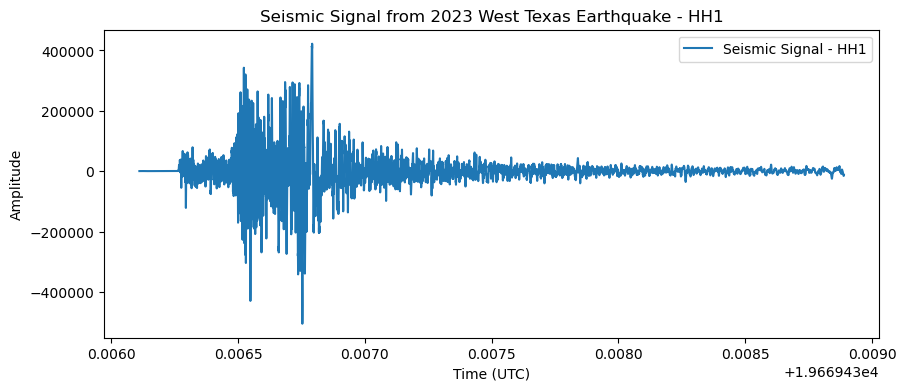

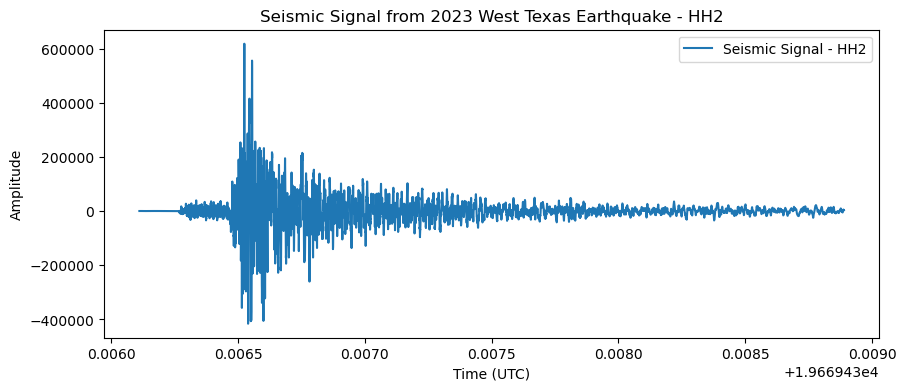

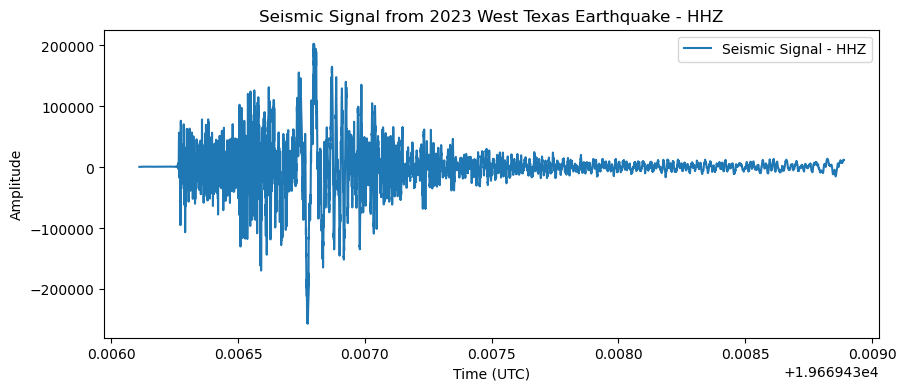

In [1]:
# Import libraries
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
import matplotlib.pyplot as plt

# Set up the FDSN client for IRIS
client = Client("IRIS")

# Define the event time and location
origin_time = UTCDateTime("2023-11-08T10:27:00")
latitude = 31.372
longitude = -103.780
magnitude = 5.3

# Print event details
print(f"Event time: {origin_time}")
print(f"Location: ({latitude}, {longitude})")
print(f"Magnitude: {magnitude}")

# Define the network, station, location, and channel codes
network = "TX"  # Texas Seismic Network
station = "ODSA"  # Specific station in Texas
location = "00"
channels = ["HHZ", "HH1", "HH2"]  # Three-component high-frequency channels

# Define the time range for the data request
start_time = UTCDateTime("2023-11-08T10:28:00")
end_time = UTCDateTime("2023-11-08T10:32:00")

# Fetch waveform data
stream = client.get_waveforms(network=network, station=station, location=location, channel="HH?", starttime=start_time, endtime=end_time)

# Print the stream details
print(stream)

# Plot the seismic signal for each channel
for tr in stream:
    plt.figure(figsize=(10, 4))
    plt.plot(tr.times("matplotlib"), tr.data, label=f'Seismic Signal - {tr.stats.channel}')
    plt.xlabel('Time (UTC)')
    plt.ylabel('Amplitude')
    plt.title(f'Seismic Signal from 2023 West Texas Earthquake - {tr.stats.channel}')
    plt.legend()
    plt.show()


# 2. Applying Basic Signal Processing Techniques 

Filtering is an essential signal processing technique used to isolate specific frequency components of a signal. The main types of filters we will explore are:

- **Low-pass filter:** Allows frequencies below a certain cutoff frequency to pass through and attenuates frequencies above the cutoff.
- **High-pass filter:** Allows frequencies above a certain cutoff frequency to pass through and attenuates frequencies below the cutoff.
- **Band-pass filter:** Allows frequencies within a specific range (between a lower and upper cutoff frequency) to pass through and attenuates frequencies outside this range.

## Applying Low-pass Filter
A low-pass filter removes high-frequency noise and retains the low-frequency components of the signal.

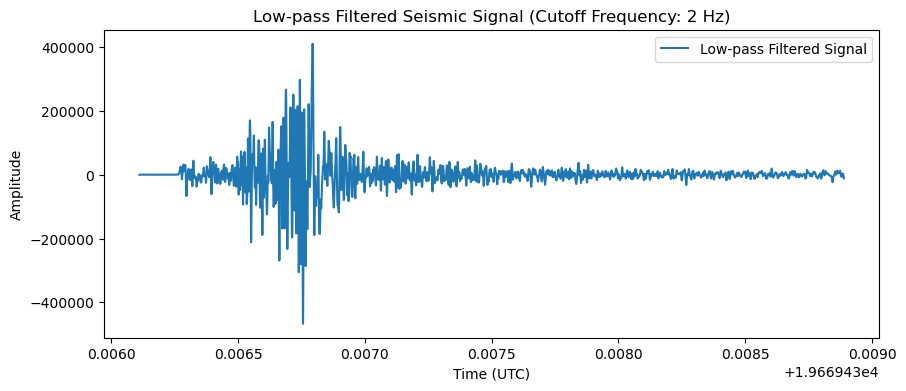

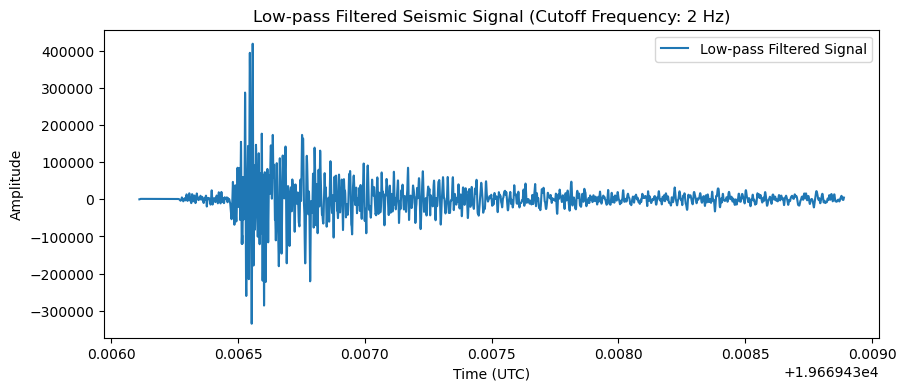

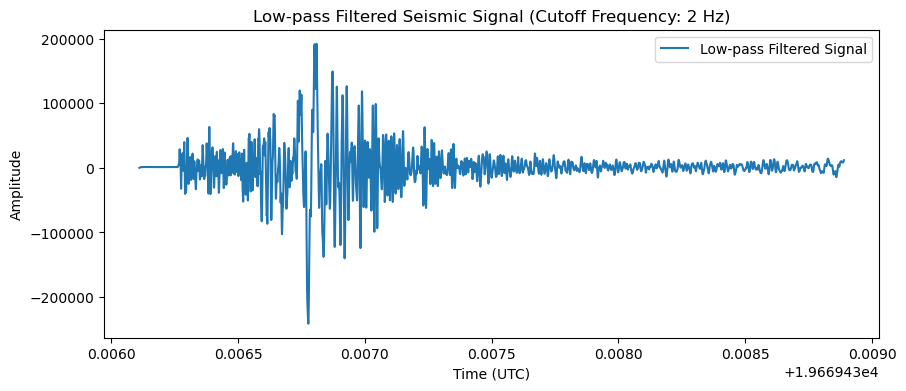

In [5]:
from obspy.signal.filter import lowpass

# Define the cutoff frequency for the low-pass filter
low_cutoff = 2  # Hz

# Apply the low-pass filter to each trace in the stream
for tr in stream:
    lowpass_trace = lowpass(tr.data, low_cutoff, tr.stats.sampling_rate)
    
    # Plot the low-pass filtered signal
    plt.figure(figsize=(10, 4))
    plt.plot(tr.times("matplotlib"), lowpass_trace, label='Low-pass Filtered Signal')
    plt.xlabel('Time (UTC)')
    plt.ylabel('Amplitude')
    plt.title(f'Low-pass Filtered Seismic Signal (Cutoff Frequency: {low_cutoff} Hz)')
    plt.legend()
    plt.show()

## Applying High-pass Filter
A high-pass filter removes low-frequency noise and retains the high-frequency components of the signal.

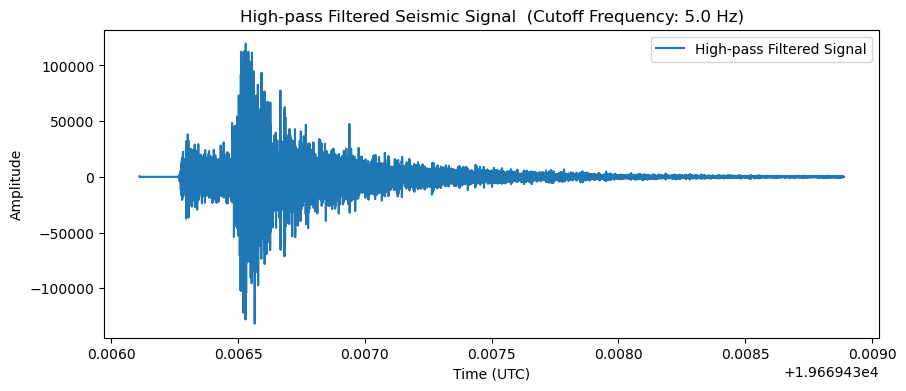

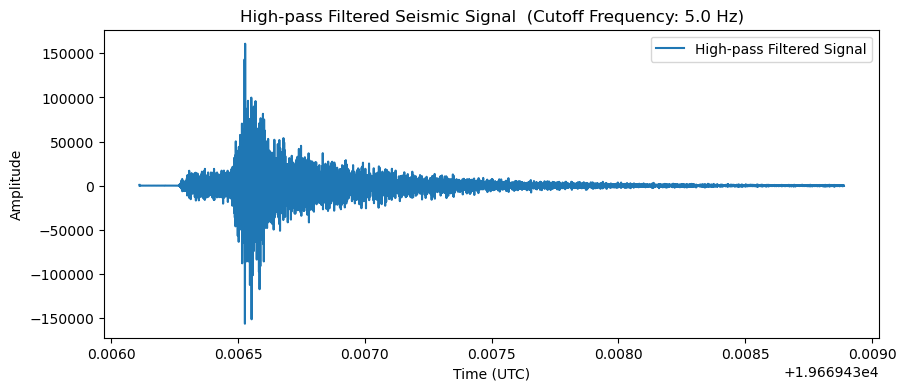

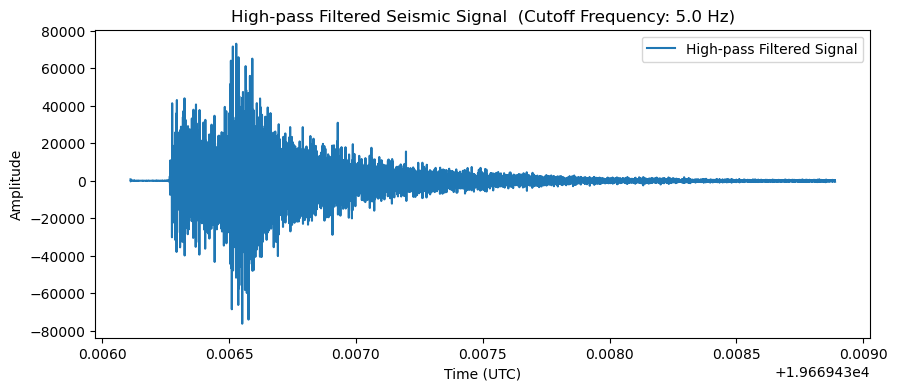

In [6]:
from obspy.signal.filter import highpass

# Define the cutoff frequency for the high-pass filter
high_cutoff = 5.0  # Hz

# Apply the high-pass filter to each trace in the stream
for tr in stream:
    highpass_trace = highpass(tr.data, high_cutoff, tr.stats.sampling_rate)
    
    # Plot the high-pass filtered signal
    plt.figure(figsize=(10, 4))
    plt.plot(tr.times("matplotlib"), highpass_trace, label='High-pass Filtered Signal')
    plt.xlabel('Time (UTC)')
    plt.ylabel('Amplitude')
    plt.title(f'High-pass Filtered Seismic Signal  (Cutoff Frequency: {high_cutoff} Hz)')
    plt.legend()
    plt.show()


## Applying Band-pass Filter
A band-pass filter retains frequencies within a specific range and removes frequencies outside this range.

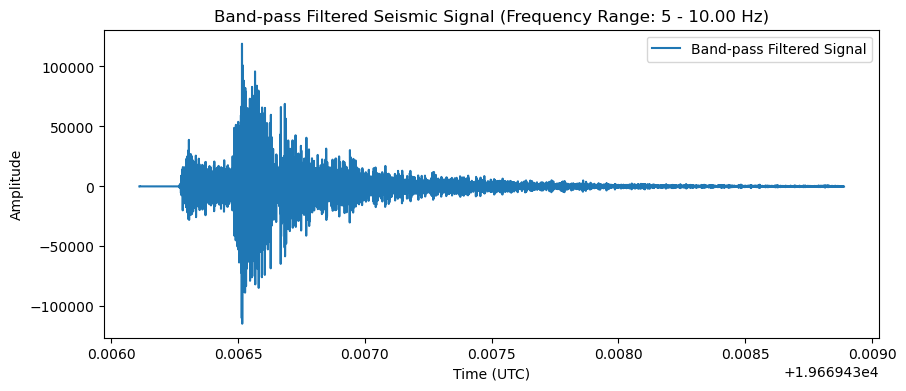

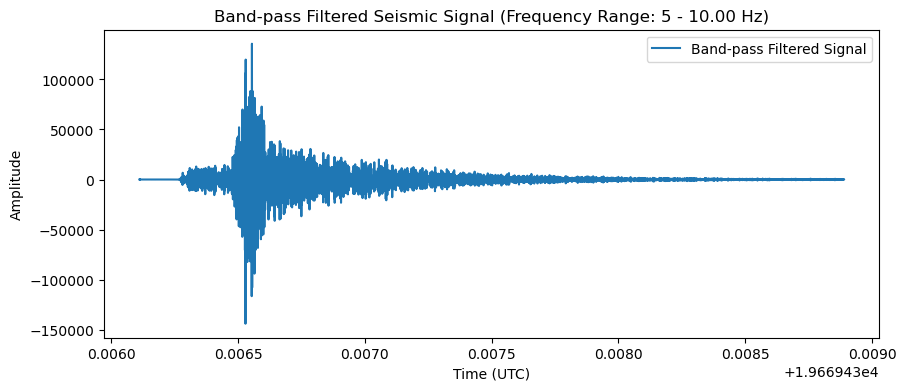

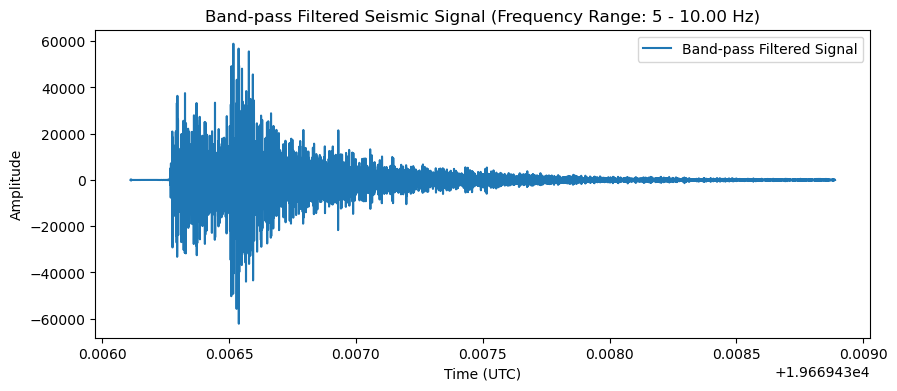

In [8]:
from obspy.signal.filter import bandpass

# Apply the band-pass filter to each trace in the stream
for tr in stream:
    # Determine the Nyquist frequency
    nyquist_freq = tr.stats.sampling_rate / 2.0
    
    # Define the frequency range for the band-pass filter
    freqmin = 5  # Minimum frequency
    freqmax = nyquist_freq * 0.10  # Slightly below Nyquist frequency
    
    # Apply the band-pass filter
    bandpass_trace = bandpass(tr.data, freqmin, freqmax, tr.stats.sampling_rate)
    
    # Plot the band-pass filtered signal
    plt.figure(figsize=(10, 4))
    plt.plot(tr.times("matplotlib"), bandpass_trace, label='Band-pass Filtered Signal')
    plt.xlabel('Time (UTC)')
    plt.ylabel('Amplitude')
    plt.title(f'Band-pass Filtered Seismic Signal (Frequency Range: {freqmin} - {freqmax:.2f} Hz)')
    plt.legend()
    plt.show()


# 3. Understanding Spectrograms 

## Background on Spectrograms
A spectrogram is a powerful tool used in signal processing to visualize how the frequency content of a signal changes over time. It provides a time-frequency representation of the signal, allowing us to see which frequencies are present at any given moment.

The spectrogram is generated by performing a **Short-Time Fourier Transform (STFT)** on the signal. The STFT breaks the signal into overlapping segments, applies a window function, and then computes the Fourier Transform for each segment. This results in a two-dimensional plot with time on one axis, frequency on the other, and amplitude represented by color or intensity.

## Understanding the Fourier Transform
The Fourier Transform (FT) is a mathematical operation that transforms a time-domain signal into its frequency-domain representation. It decomposes a signal into its constituent frequencies, providing a clear view of the frequency components present in the signal.

The Fast Fourier Transform (FFT) is an efficient algorithm for computing the Fourier Transform. It is widely used in digital signal processing due to its speed and accuracy.

## Key Concepts:

**Frequency Domain:** The representation of a signal based on its frequency content rather than time.
**Amplitude:** The strength or magnitude of a particular frequency component.
**Windowing:** The application of a window function to minimize discontinuities at the segment boundaries in the STFT.

## Orginal Signal

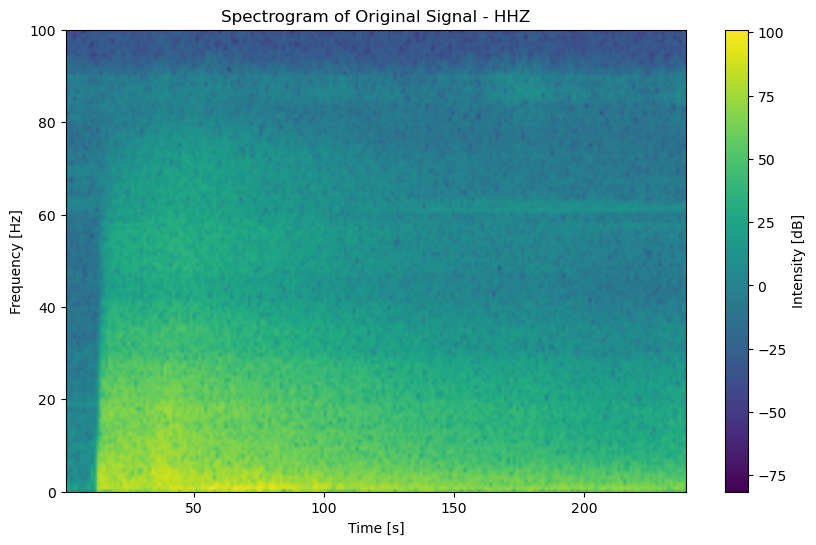

In [9]:
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import numpy as np

# Select the Z component (HHZ) trace from the stream
z_trace = stream.select(channel="HHZ")[0]

# Define parameters for the spectrogram
nperseg = 256  # Length of each segment for STFT

# Generate the spectrogram for the Z component
f, t_spec, Sxx = spectrogram(z_trace.data, z_trace.stats.sampling_rate, nperseg=nperseg)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title(f'Spectrogram of Original Signal - {z_trace.stats.channel}')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 100)
plt.show()

## Lowpass Signal

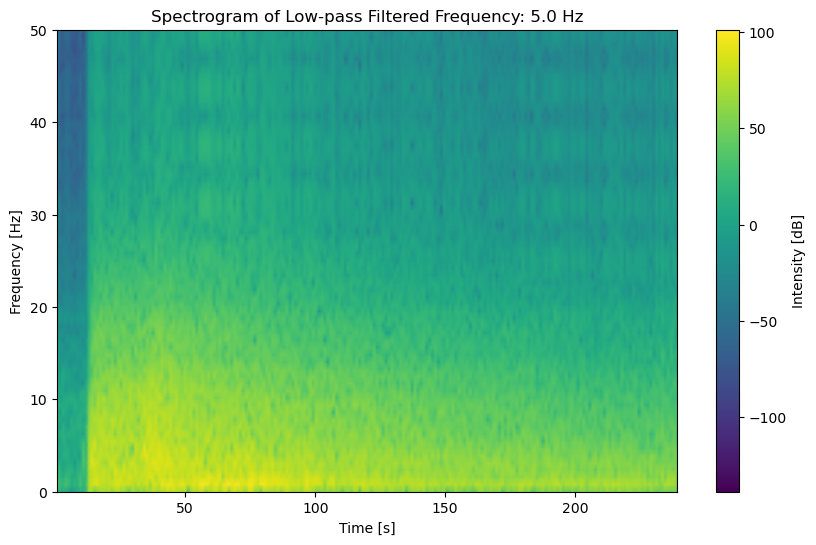

In [10]:

# Define the cutoff frequency for the low-pass filter
low_cutoff = 10  # Hz

# Apply the low-pass filter to the Z component
lowpass_trace = lowpass(z_trace.data, low_cutoff, z_trace.stats.sampling_rate)

# Define parameters for the spectrogram
nperseg = 256  # Length of each segment for STFT

# Generate the spectrogram for the low-pass filtered Z component
f, t_spec, Sxx = spectrogram(lowpass_trace, z_trace.stats.sampling_rate, nperseg=nperseg)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title(f'Spectrogram of Low-pass Filtered Frequency: {high_cutoff} Hz')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 50)
plt.show()

## Highpass Signal

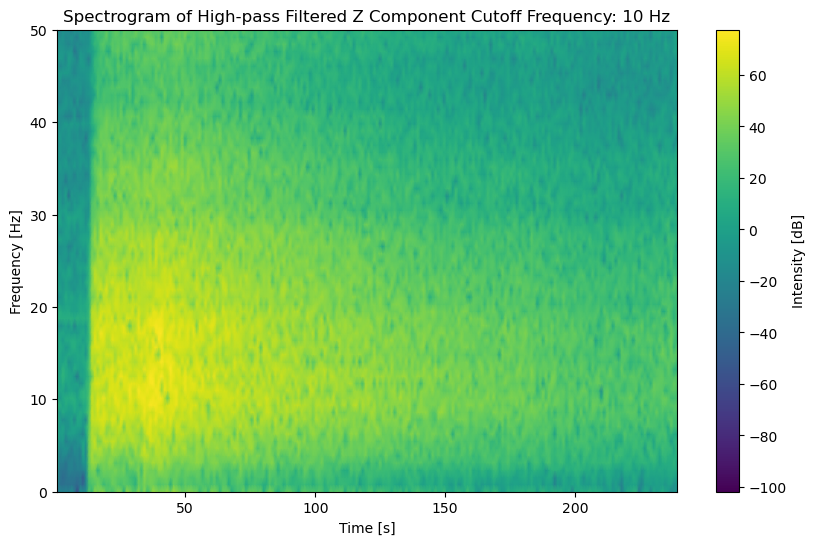

In [11]:
# Define the cutoff frequency for the high-pass filter
high_cutoff = 10  # Hz

# Apply the high-pass filter to the Z component
highpass_trace = highpass(z_trace.data, high_cutoff, z_trace.stats.sampling_rate)

# Define parameters for the spectrogram
nperseg = 256  # Length of each segment for STFT

# Generate the spectrogram for the high-pass filtered Z component
f, t_spec, Sxx = spectrogram(highpass_trace, z_trace.stats.sampling_rate, nperseg=nperseg)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title(f'Spectrogram of High-pass Filtered Z Component Cutoff Frequency: {high_cutoff} Hz')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 50)  # Adjust y-axis limit to Nyquist frequency
plt.show()

## Bandpass Signal

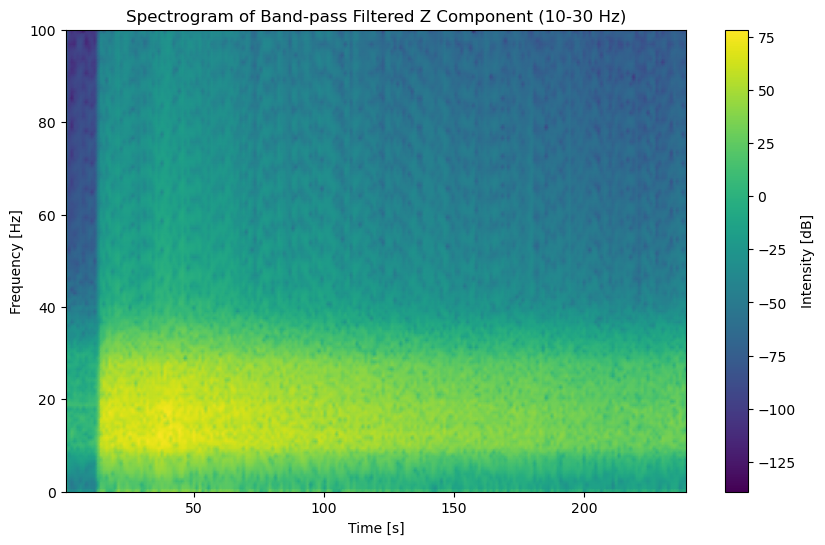

In [12]:
# Define the frequency range for the band-pass filter
freqmin = 10.0  # Minimum frequency in Hz
freqmax = 30.0  # Maximum frequency in Hz

# Apply the band-pass filter to the Z component
bandpass_trace = bandpass(z_trace.data, freqmin, freqmax, z_trace.stats.sampling_rate, corners=4, zerophase=True)

# Define parameters for the spectrogram
nperseg = 256  # Length of each segment for STFT

# Generate the spectrogram for the band-pass filtered Z component
f, t_spec, Sxx = spectrogram(bandpass_trace, z_trace.stats.sampling_rate, nperseg=nperseg)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title(f'Spectrogram of Band-pass Filtered Z Component (10-30 Hz)')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, z_trace.stats.sampling_rate / 2.0)  # Adjust y-axis limit to Nyquist frequency
plt.show()

### Key Takeaways
- Spectrograms provide a comprehensive view of how a signal's frequency content evolves over time.
- Different filters (low-pass, high-pass, band-pass) allow us to isolate specific frequency components of interest.
- The Fourier Transform is a fundamental tool in signal processing, offering insights into the frequency domain representation of signals.


# 4. New Methodologies in Signal Denoising

## Introduction to DeepDenoiser
DeepDenoiser is a deep learning-based denoising model designed to enhance seismic data quality. By applying deep neural networks, DeepDenoiser effectively removes noise from seismic signals, allowing for more accurate event detection and phase picking. This technique is particularly useful in complex scenarios where traditional denoising methods may fall short, such as when dealing with overlapping signals from multiple events.

## Key Advantages of DeepDenoiser:

- Enhanced Noise Reduction: It significantly reduces noise, especially in the presence of overlapping signals.
- Improved Event Picking: By cleaning up the signals, it improves the accuracy of picking models for seismic events.
- Adaptability: It can be applied to various datasets, making it versatile for different seismic studies.

In [ ]:
!pip install seisbench 

/srv/conda/envs/notebook/lib/python3.11/site-packages/seisbench/models/base.py:489: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_weights = torch.load(f"{path_pt}")


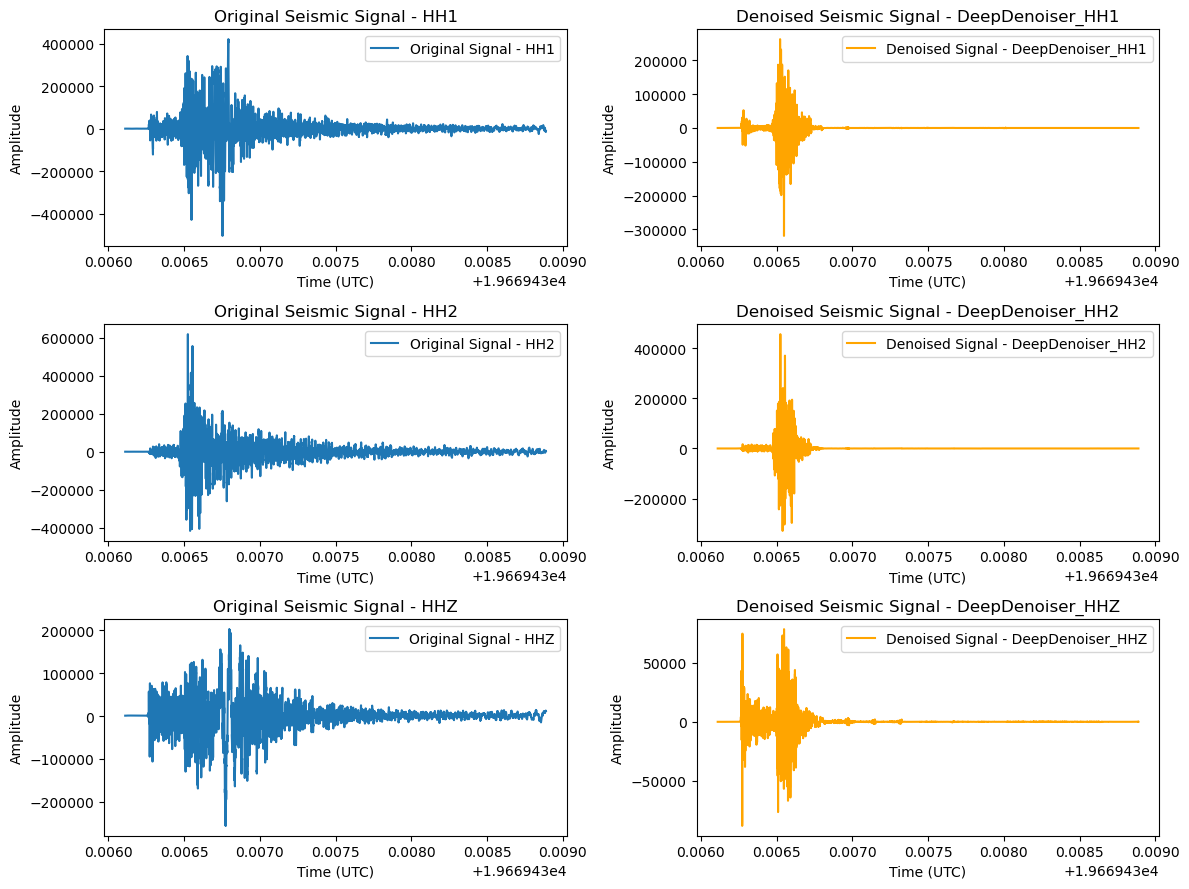

In [13]:
# Import necessary libraries
import seisbench.models as sbm
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import numpy as np

# Import necessary libraries
import seisbench.models as sbm
import matplotlib.pyplot as plt


# Load the pre-trained DeepDenoiser model
model = sbm.DeepDenoiser.from_pretrained("original")

# Apply the DeepDenoiser model to the original stream
annotations = model.annotate(stream)

# Ensure both the original stream and annotations have the same traces
assert len(stream) == len(annotations), "The number of traces in the original stream and annotations must match."

# Plot each original and denoised signal for comparison
plt.figure(figsize=(12, 3 * len(stream)))

for i, (original_trace, denoised_trace) in enumerate(zip(stream, annotations)):
    # Plot the original signal
    plt.subplot(len(stream), 2, 2 * i + 1)
    plt.plot(original_trace.times("matplotlib"), original_trace.data, label=f"Original Signal - {original_trace.stats.channel}")
    plt.xlabel("Time (UTC)")
    plt.ylabel("Amplitude")
    plt.title(f"Original Seismic Signal - {original_trace.stats.channel}")
    plt.legend()

    # Plot the denoised signal
    plt.subplot(len(stream), 2, 2 * i + 2)
    plt.plot(denoised_trace.times("matplotlib"), denoised_trace.data, label=f"Denoised Signal - {denoised_trace.stats.channel}", color='orange')
    plt.xlabel("Time (UTC)")
    plt.ylabel("Amplitude")
    plt.title(f"Denoised Seismic Signal - {denoised_trace.stats.channel}")
    plt.legend()

plt.tight_layout()
plt.show()


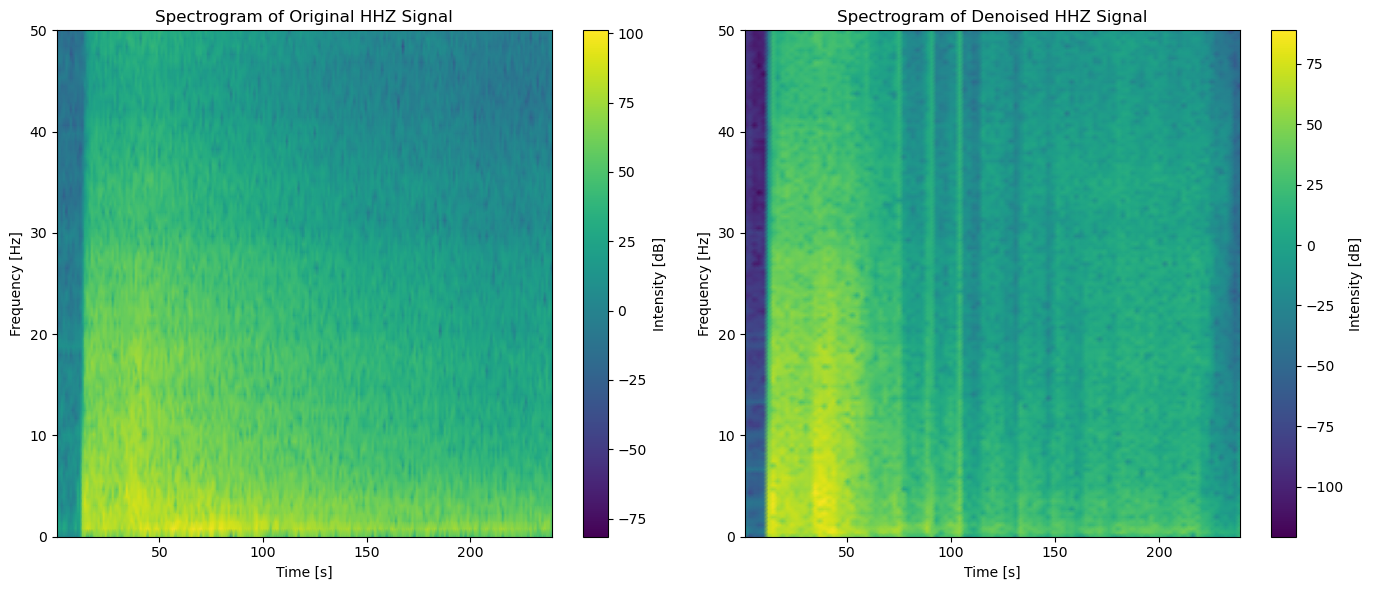

In [17]:
# Import necessary libraries
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Select the HHZ component from both the original stream and the denoised annotations
original_hhz = stream.select(channel="HHZ")[0]

# Adjust the channel name to match the denoised signal's actual name
denoised_hhz = annotations.select(channel="DeepDenoiser_HHZ")[0]

# Define parameters for the spectrogram
nperseg = 256  # Length of each segment for STFT

# Generate the spectrogram for the original HHZ signal
f_original, t_original, Sxx_original = spectrogram(original_hhz.data, original_hhz.stats.sampling_rate, nperseg=nperseg)

# Generate the spectrogram for the denoised HHZ signal
f_denoised, t_denoised, Sxx_denoised = spectrogram(denoised_hhz.data, denoised_hhz.stats.sampling_rate, nperseg=nperseg)

# Plot the spectrograms
plt.figure(figsize=(14, 6))

# Original signal spectrogram
plt.subplot(1, 2, 1)
plt.pcolormesh(t_original, f_original, 10 * np.log10(Sxx_original), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of Original HHZ Signal')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 50)  # Nyquist frequency limit

# Denoised signal spectrogram
plt.subplot(1, 2, 2)
plt.pcolormesh(t_denoised, f_denoised, 10 * np.log10(Sxx_denoised), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of Denoised HHZ Signal')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 50)  # Nyquist frequency limit

plt.tight_layout()
plt.show()


Using the DeepDenoiser package from SeisBench provides powerful capabilities for enhancing seismic data by reducing noise and improving signal clarity. Here are some key takeaways based on the workflow and results we've explored:

- **Effective Noise Reduction**
Key Benefit: The DeepDenoiser model effectively reduces noise in seismic data, particularly in environments where traditional filtering might struggle to isolate signal from complex noise patterns.
Result: After applying the denoiser, the seismic signal retains its essential features (e.g., P-waves, S-waves) while significantly reducing the background noise, as evidenced by the spectrogram comparison. This leads to a clearer signal that is easier to interpret and analyze.

- **Preservation of Signal Integrity**
Key Benefit: The denoising process preserves the integrity of the original seismic signal, which is crucial for accurate analysis in seismology.
Result: The denoised signals showed minimal distortion, maintaining the original timing and amplitude characteristics. This makes the denoiser suitable for applications where the preservation of signal details is critical, such as in phase picking or earthquake localization.


- **Improvement in Signal-to-Noise Ratio (SNR)**
Key Benefit: The denoiser significantly improves the Signal-to-Noise Ratio (SNR), making it easier to identify and analyze seismic events.
Result: The calculated SNR for denoised signals was substantially higher compared to the original signals. This is particularly beneficial in scenarios with low-magnitude events or in noisy environments where the signal might otherwise be obscured.